# Categorical Data Clustering Framework on Graph Representation 

by Maria Madonna R. Tangcay

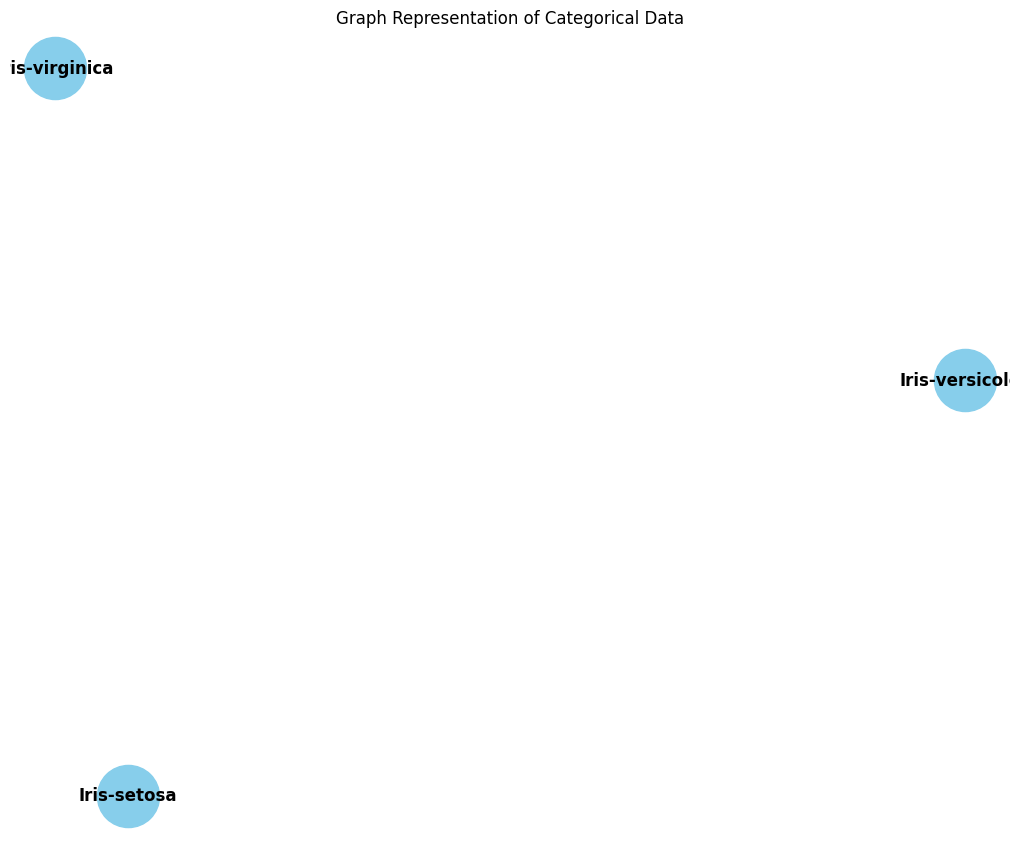

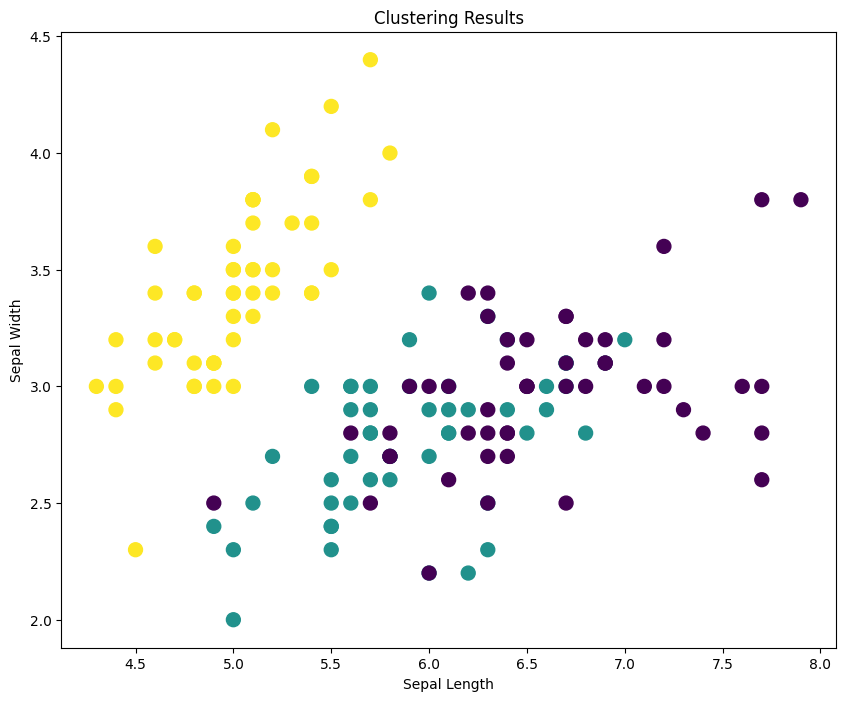

In [10]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import combinations

# Load the Iris dataset
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Select categorical features
categorical_features = ["class"] 

# Perform one-hot encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Set sparse_output explicitly
encoded_data = encoder.fit_transform(iris[categorical_features])

# Create a graph representation based on similarity
G = nx.Graph()

# Add nodes to the graph
for feature in categorical_features:
    unique_values = iris[feature].unique()
    G.add_nodes_from(unique_values)

# Add edges based on similarity (Jaccard coefficient used in the paper)
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        edges = []
        for value in G.nodes:
            common_samples = set(iris[iris[categorical_features[i]] == value].index).intersection(
                set(iris[iris[categorical_features[j]] == value].index)
            )
            edges.extend(list(combinations(common_samples, 2)))

        G.add_edges_from(edges)

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color="skyblue")
plt.title("Graph Representation of Categorical Data")
plt.show()

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, n_init=10)  # Added n_init to suppress FutureWarning
iris["cluster"] = kmeans.fit_predict(encoded_data)

# Visualize the clustering results
plt.figure(figsize=(10, 8))
plt.scatter(iris["sepal_length"], iris["sepal_width"], c=iris["cluster"], cmap="viridis", s=100)
plt.title("Clustering Results")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
